In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
import warnings
import yfinance as yf
from datetime import date 
from dateutil.relativedelta import *
warnings.filterwarnings("ignore")

start_date = date.today() + relativedelta(months=-3)
end_str = str(date.today())

start_str = str(start_date)
print("start_date : "+ start_str , " , end_date : " + end_str)

start_date : 2023-07-24  , end_date : 2023-10-24


In [2]:
def loadFinanceDF(finIndx):
    df = yf.download(finIndx , start=start_str, end=end_str)
    df = df.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1)
    df.columns = [finIndx+'_cl', finIndx + '_vol']
    return df

mstr_change = loadFinanceDF('mstr')
msft_change = loadFinanceDF('msft')
orcl_change = loadFinanceDF('orcl')

indx = pd.concat([mstr_change, msft_change, orcl_change], axis=1)

indx.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,mstr_cl,mstr_vol,msft_cl,msft_vol,orcl_cl,orcl_vol
Date,,,,,,
2023-07-24,430.940002,655000,345.109985,26678100,118.070000,6200400.0
2023-07-25,436.820007,447900,350.980011,41637700,117.949997,6266300.0
2023-07-26,443.459991,530000,337.769989,58383700,115.500000,8160000.0
2023-07-27,426.149994,565500,330.720001,39635300,116.400002,7843000.0
2023-07-28,434.609985,463900,338.369995,28484900,115.989998,6910400.0


In [3]:
print(indx.isnull().sum())

mstr_cl     0
mstr_vol    0
msft_cl     0
msft_vol    0
orcl_cl     5
orcl_vol    5
dtype: int64


In [4]:
indx.dropna(inplace=True, axis=0)
indx.dtypes
#indx.shape

mstr_cl     float64
mstr_vol      int64
msft_cl     float64
msft_vol      int64
orcl_cl     float64
orcl_vol    float64
dtype: object

In [5]:
indx[-12:].describe()

,mstr_cl,mstr_vol,msft_cl,msft_vol,orcl_cl,orcl_vol
count,12.000000,1.200000e+01,12.000000,1.200000e+01,12.000000,1.200000e+01
mean,332.364998,5.344250e+05,324.613337,2.119237e+07,107.769166,7.378261e+06
std,17.077407,2.638839e+05,6.438815,2.408781e+06,2.203268,1.538477e+06
min,311.329987,3.063000e+05,313.390015,1.696560e+07,103.660004,5.641700e+06
25%,322.665009,3.898250e+05,319.259987,2.002020e+07,106.512499,6.000175e+06
50%,328.884995,4.278000e+05,327.495010,2.064505e+07,108.299999,7.103250e+06
75%,340.452507,5.316750e+05,329.445007,2.183938e+07,109.657499,8.380025e+06
max,377.489990,1.231500e+06,332.420013,2.564550e+07,110.320000,1.071403e+07


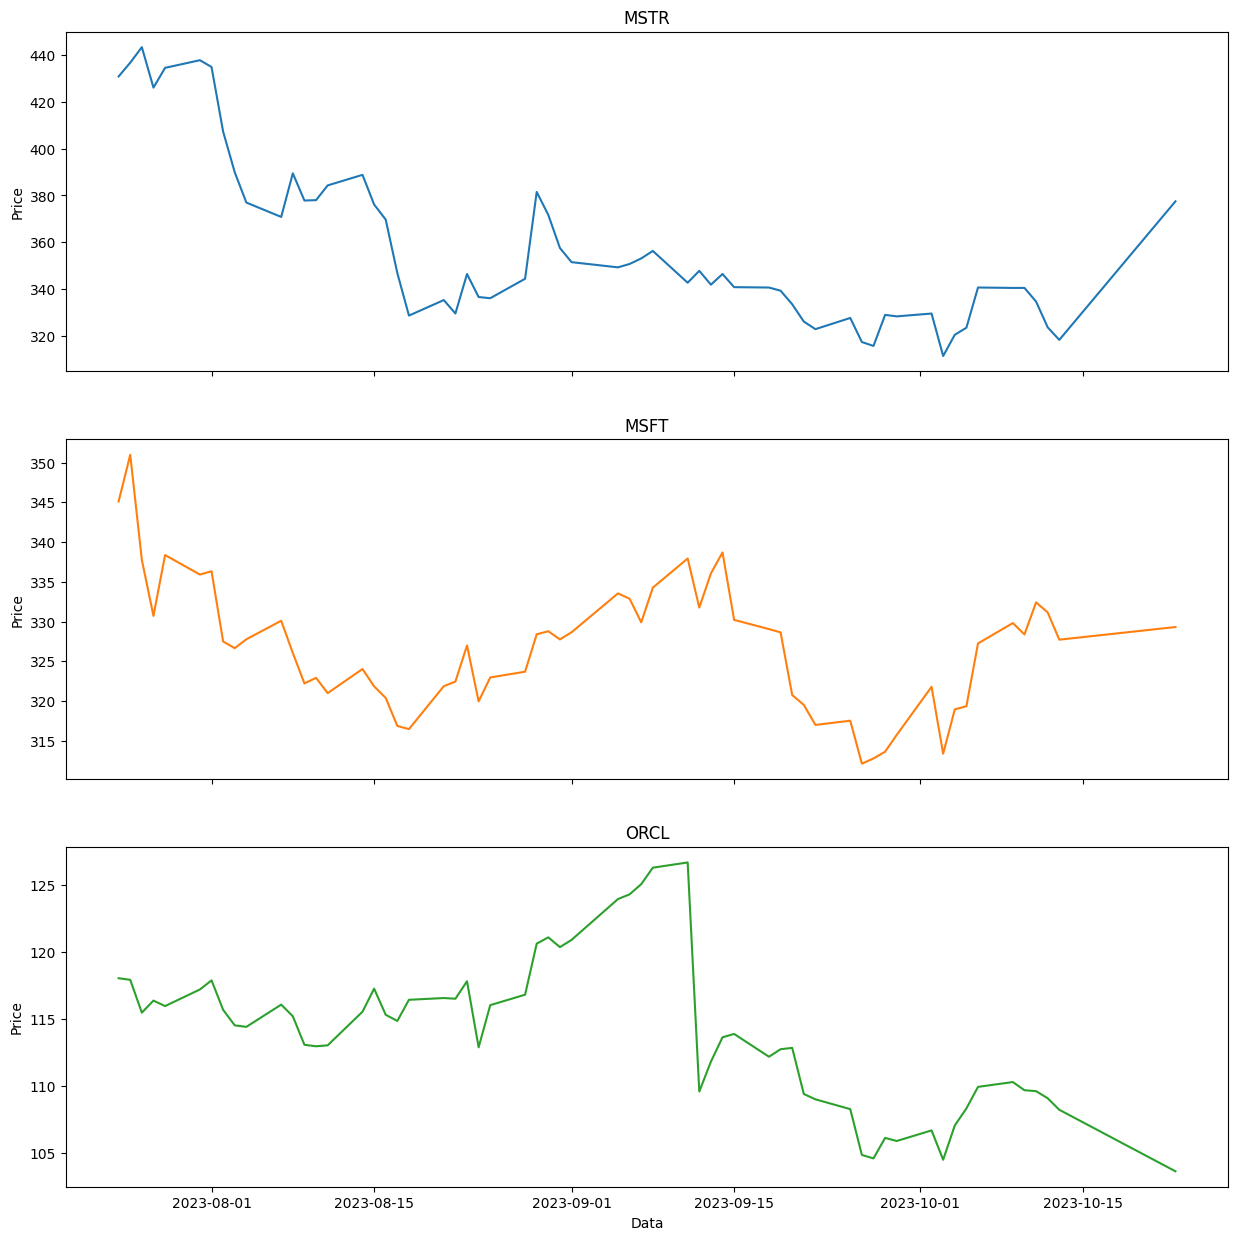

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(15,15))
axs[0].plot(indx.index, indx['mstr_cl'], 'tab:blue' )
axs[0].set_title('MSTR')
axs[1].plot(indx.index, indx['msft_cl'], 'tab:orange')
axs[1].set_title('MSFT')
axs[2].plot(indx.index, indx['orcl_cl'], 'tab:green')
axs[2].set_title('ORCL')
# axs[1, 1].plot(indx.index, indx['fxus_cl'], 'tab:red')
# axs[1, 1].set_title('FXUS')
# axs[2, 0].plot(indx.index, indx['fxru_cl'], 'tab:grey')
# axs[2, 0].set_title('FXRU')
# axs[2, 1].plot(indx.index, indx['fxcn_cl'], 'tab:purple')
# axs[2, 1].set_title('FXCN')


for ax in axs.flat:
    ax.set(xlabel='Data', ylabel='Price')

for ax in axs.flat:
    ax.label_outer()

In [7]:
indx_cl = indx[['mstr_cl', 'msft_cl', 'orcl_cl']]
indx_cl_pct = indx_cl.pct_change()*100
indx_cl_pct.columns = ['mstr_cl_pct', 'msft_cl_pct', 'orcl_cl_pct']
indx_vol = indx[['mstr_vol', 'msft_vol', 'orcl_vol']]
indx_new = pd.concat([indx_cl,  indx_vol, indx_cl_pct], axis = 1)

indx_new = indx_new.dropna()
indx_new.head()

,mstr_cl,msft_cl,orcl_cl,mstr_vol,msft_vol,orcl_vol,mstr_cl_pct,msft_cl_pct,orcl_cl_pct
Date,,,,,,,,,
2023-07-25,436.820007,350.980011,117.949997,447900,41637700,6266300.0,1.364460,1.700914,-0.101637
2023-07-26,443.459991,337.769989,115.500000,530000,58383700,8160000.0,1.520073,-3.763753,-2.077149
2023-07-27,426.149994,330.720001,116.400002,565500,39635300,7843000.0,-3.903396,-2.087216,0.779222
2023-07-28,434.609985,338.369995,115.989998,463900,28484900,6910400.0,1.985214,2.313133,-0.352237
2023-07-31,437.880005,335.920013,117.230003,486300,25446000,6703100.0,0.752403,-0.724054,1.069062


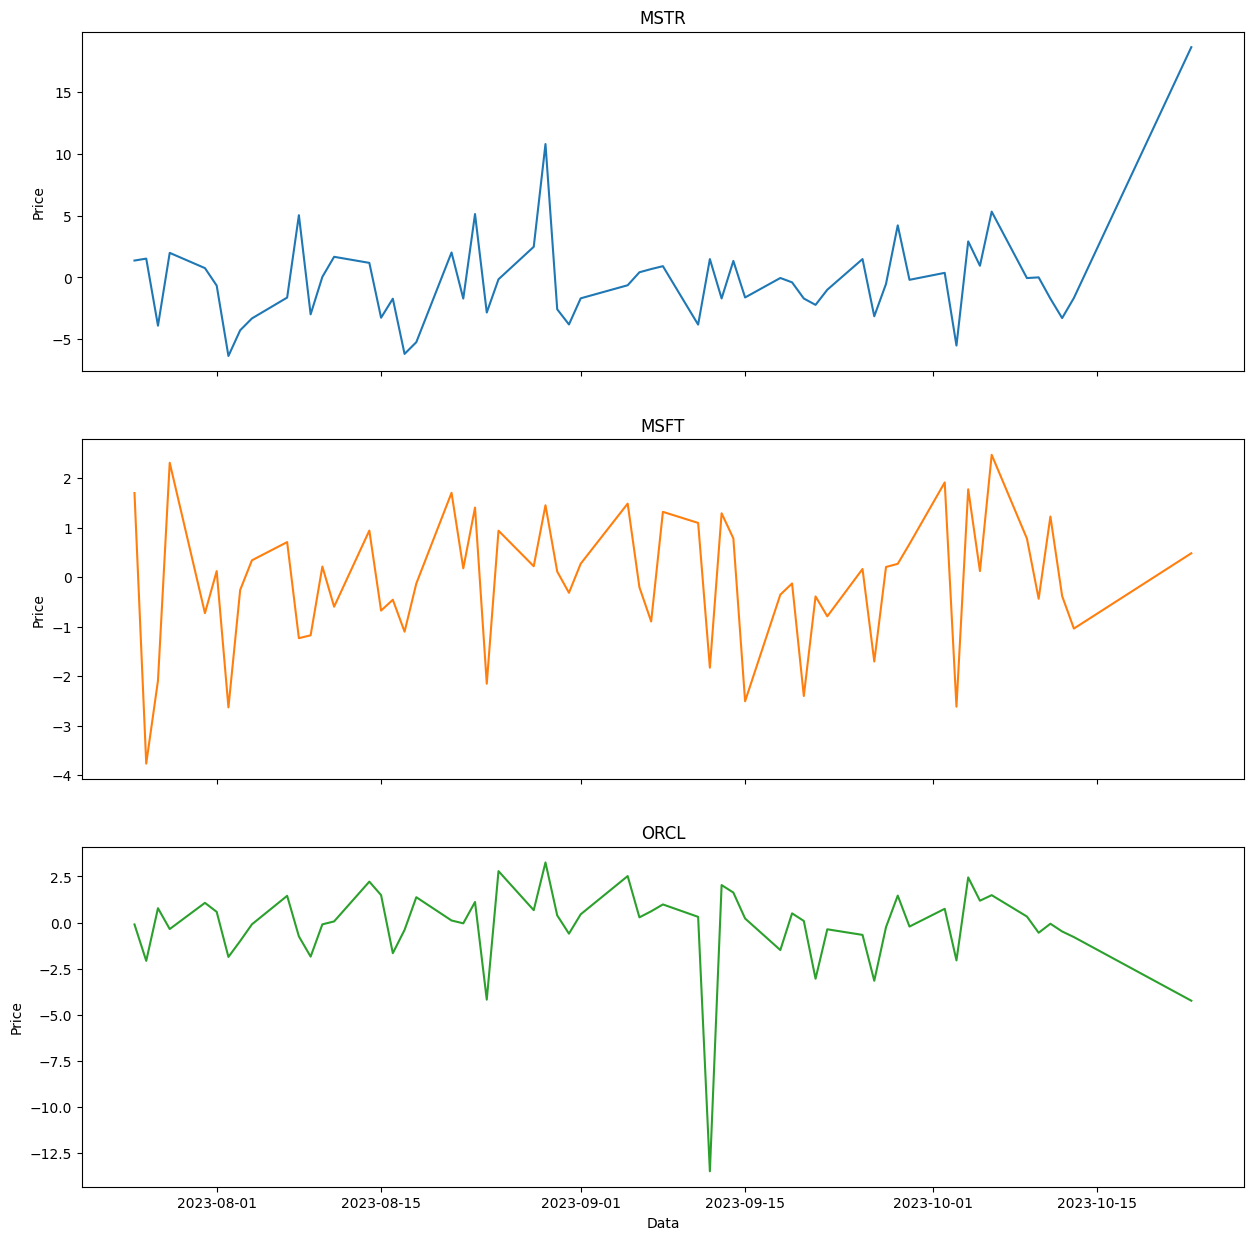

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(15,15))
axs[0].plot(indx_new.index, indx_new['mstr_cl_pct'], 'tab:blue')
axs[0].set_title('MSTR')
axs[1].plot(indx_new.index, indx_new['msft_cl_pct'], 'tab:orange')
axs[1].set_title('MSFT')
axs[2].plot(indx_new.index, indx_new['orcl_cl_pct'], 'tab:green')
axs[2].set_title('ORCL')
# axs[1, 1].plot(indx_new.index, indx_new['fxus_cl_pct'], 'tab:red')
# axs[1, 1].set_title('FXUS')
# axs[2, 0].plot(indx_new.index, indx_new['fxru_cl_pct'], 'tab:grey')
# axs[2, 0].set_title('FXRU')
# axs[2, 1].plot(indx_new.index, indx_new['fxcn_cl_pct'], 'tab:purple')
# axs[2, 1].set_title('FXCN')

for ax in axs.flat:
    ax.set(xlabel='Data', ylabel='Price')

for ax in axs.flat:
    ax.label_outer()

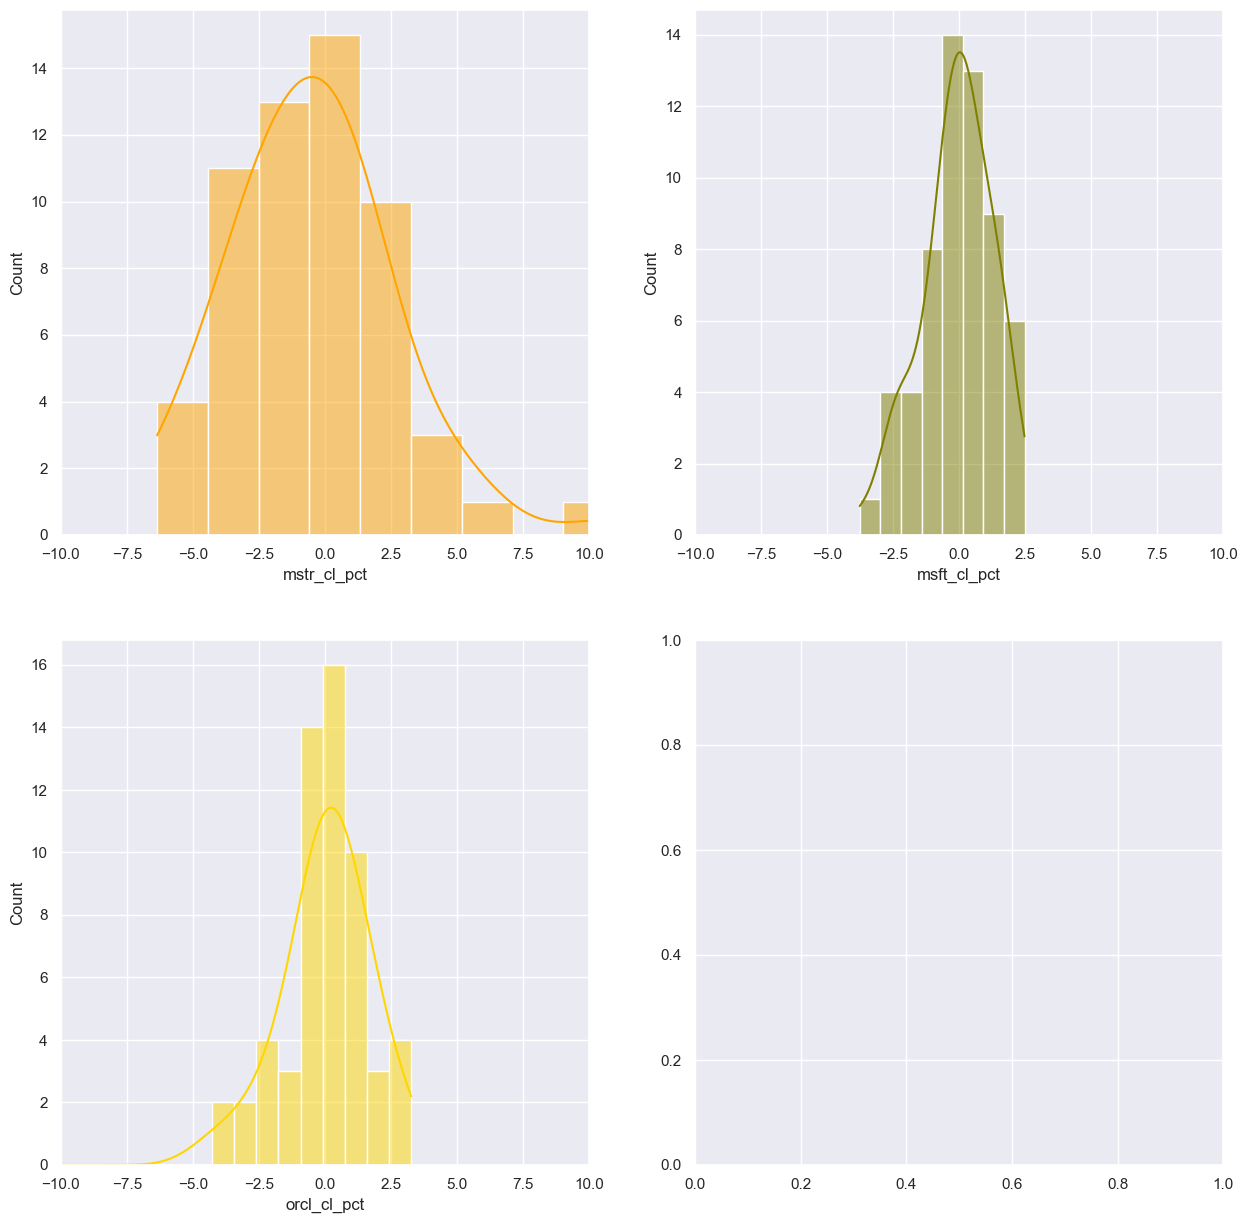

In [9]:
import seaborn as sns
 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(15,15))

sns.histplot(data=indx_new['mstr_cl_pct'], kde=True, color="orange", ax=axs[0, 0])
axs[0,0].set_xlim(-10,10)
sns.histplot(data=indx_new['msft_cl_pct'], kde=True, color="olive", ax=axs[0, 1])
axs[0,1].set_xlim(-10,10)
sns.histplot(data=indx_new['orcl_cl_pct'], kde=True, color="gold", ax=axs[1, 0])
axs[1,0].set_xlim(-10,10)
# sns.histplot(data=indx_new['fxus_cl_pct'], kde=True, color="grey", ax=axs[1, 1])
# axs[1,1].set_xlim(-10,10)
# sns.histplot(data=indx_new['fxru_cl_pct'], kde=True, color="teal", ax=axs[2, 0])
# axs[2,0].set_xlim(-10,10)
# sns.histplot(data=indx_new['fxcn_cl_pct'], kde=True, color="brown", ax=axs[2, 1])
# axs[2,1].set_xlim(-10,10)

plt.show()